## Importing main libraries

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import copy
import seaborn as sn
import matplotlib.pyplot as plt
from copy import deepcopy


/Users/leilasapple/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/leilasapple/.matplotlib/matplotlibrc", line #621
  (fname, cnt))


## Path directory

In [2]:
input_data_path='/Users/leilasapple/Documents/Springboard/recruit-restaurant-visitor-forecasting/input_files/'
output_data_path='/Users/leilasapple/Documents/Springboard/recruit-restaurant-visitor-forecasting/output_files/'

### Data file which is generated by other part of project

In [3]:
data=pd.read_csv(os.path.join(output_data_path,'data3.csv'))


In [4]:
print(data.describe())


             visitor        holiday             dt      dayofweek  \
count  587957.000000  587957.000000  587957.000000  587957.000000   
mean        8.610766       0.064949     167.435631       3.361385   
std        10.973159       0.246435     190.366523       1.836051   
min         1.000000       0.000000       0.000000       0.000000   
25%         3.000000       0.000000      46.000000       2.000000   
50%         5.000000       0.000000     107.000000       4.000000   
75%        10.000000       0.000000     219.500000       5.000000   
max      2241.000000       1.000000    8429.284314       6.000000   

               month            day           year       capacity  
count  587957.000000  587957.000000  587957.000000  587957.000000  
mean        5.728307      16.341962    2016.344134      45.368488  
std         3.728686       8.653998       0.475085      31.605500  
min         1.000000       1.000000    2016.000000       1.000000  
25%         3.000000       9.000000   

In [5]:
print(data.head())

                                id              store_id          genre  \
0  air_877f79706adbfb06-2016-01-01  air_877f79706adbfb06  Japanese food   
1  air_db4b38ebe7a7ceff-2016-01-01  air_db4b38ebe7a7ceff     Dining bar   
2  air_db80363d35f10926-2016-01-01  air_db80363d35f10926     Dining bar   
3  air_db80363d35f10926-2016-01-02  air_db80363d35f10926     Dining bar   
4  air_3bb99a1fe0583897-2016-01-02  air_3bb99a1fe0583897        Izakaya   

   visitor                             area  holiday    dt  dayofweek  month  \
0        3     Tōkyō-to Minato-ku Shibakōen      1.0   3.5          4      1   
1        9     Ōsaka-fu Ōsaka-shi Shinmachi      1.0   0.0          4      1   
2        9  Hokkaidō Asahikawa-shi 6 Jōdōri      1.0  11.5          4      1   
3       36  Hokkaidō Asahikawa-shi 6 Jōdōri      1.0   7.3          5      1   
4        4   Miyagi-ken Sendai-shi Kamisugi      1.0  11.0          5      1   

   day  year        date  capacity  
0    1  2016  2016-01-01      1

### Extracting new data
A new set of factor is calculated from data to help in dealing with categorical data. The intuation of these factors were coming from the histogram of number of reservation on day of week and in month. 

<img src="/Users/leilasapple/Documents/Springboard/recruit-restaurant-visitor-forecasting/output_files/Weekday_hist.png"
     alt="weekly reservations"
     style="float: left; margin-right: 10px;" />



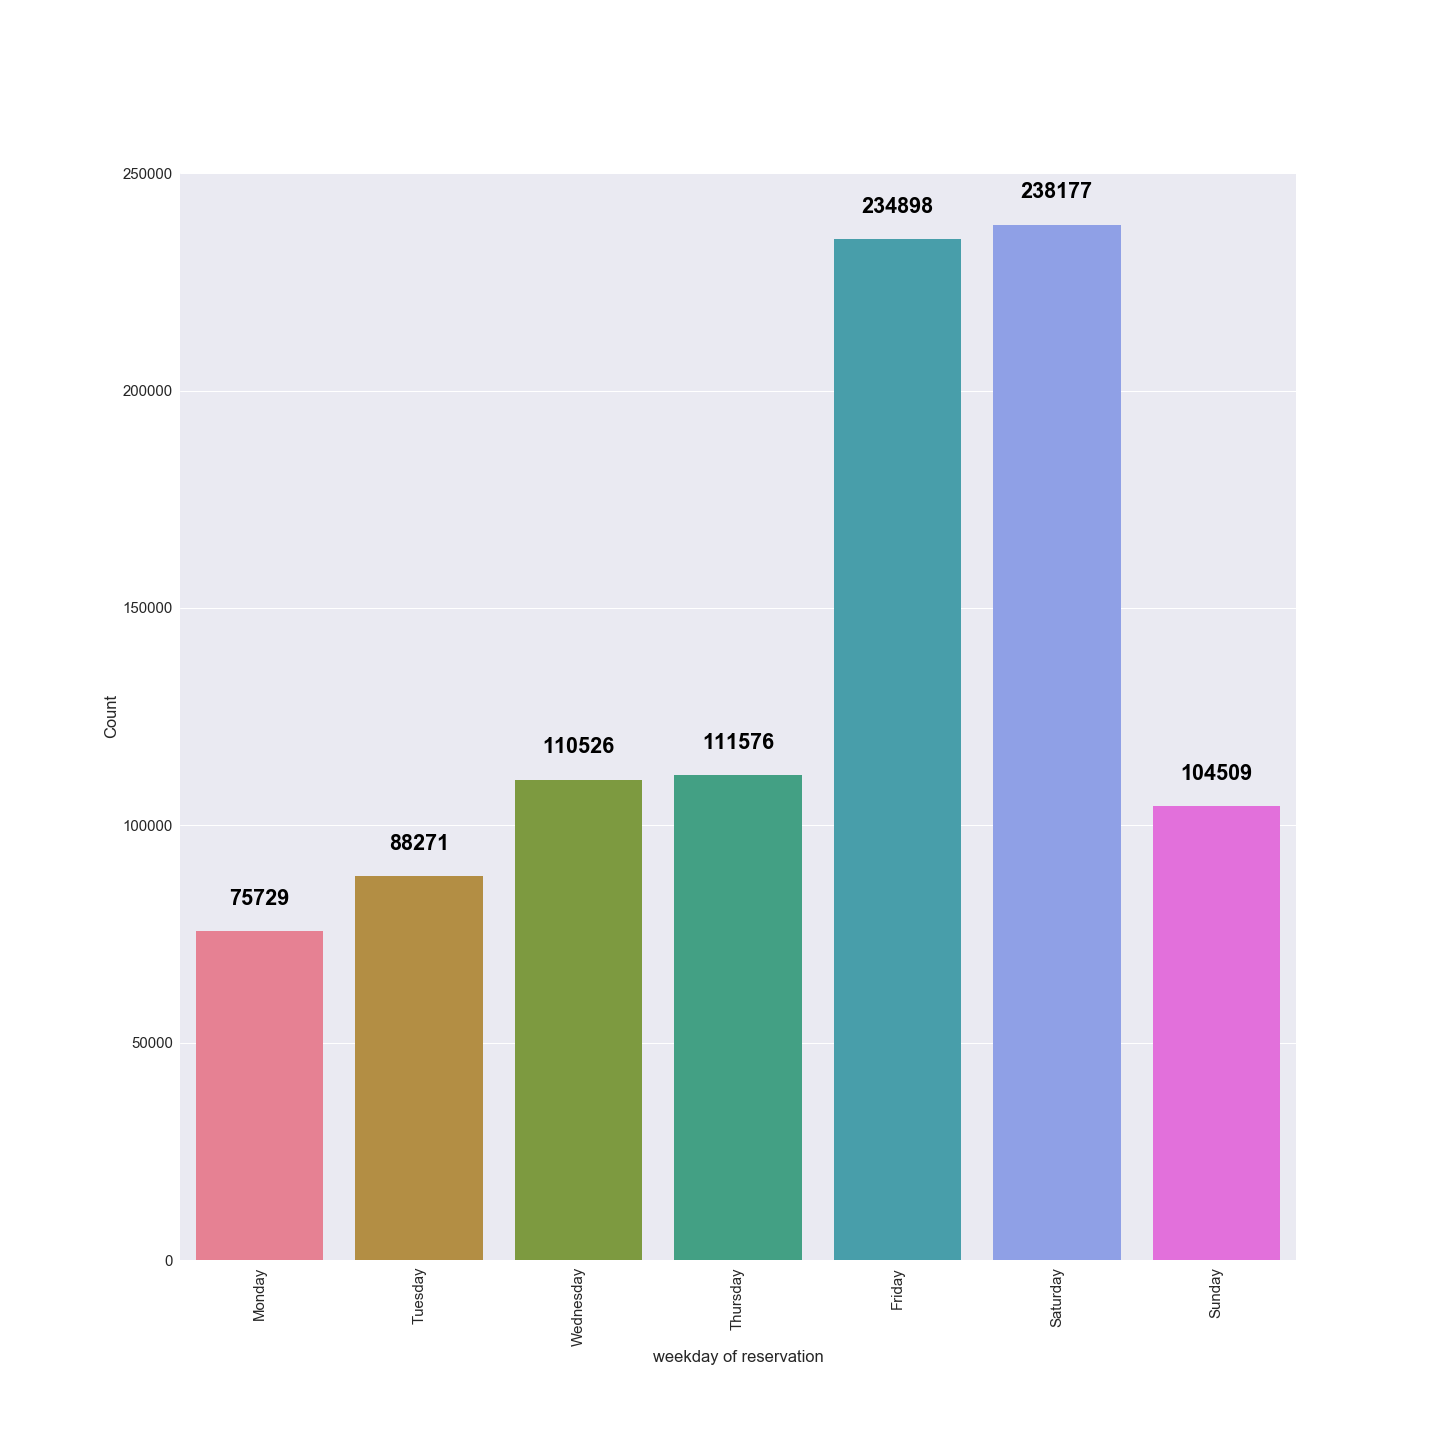

In [6]:
from IPython.display import Image
Image(filename='/Users/leilasapple/Documents/Springboard/recruit-restaurant-visitor-forecasting/output_files/Weekday_hist.png')

As it shows for example on Friday and Saturday people intent to go restaurant more rather than other days of the week. Or people like to dine out more before New Year or during  Nature celebration in March.  The factor was defined as the ration of each hight of the bar to the maximum height of bars as (hight_bar/Max(hight_bar). 

These factors introduce people's intention to the model as a number issued from categorical features like date, genre, location and the restaurant itself. 

The rate of restaurants has not been given. So, in a way, the factor of a restaurant may represent the quality and popularity of the restaurant too. In the same way, the factor of the area gives a sense of the popularity of locations and neighborhoods. 

In [8]:
grouped=data.groupby('holiday')
data['holiday_weight']=np.nan
for i in grouped.groups:
    ndx=grouped.get_group(i).index
    data.loc[ndx,'holiday_weight']=data['holiday'].value_counts()[i]/max(data['holiday'].value_counts())

grouped=data.groupby('day')
data['day_weight']=np.nan
for i in grouped.groups:
    ndx=grouped.get_group(i).index
    data.loc[ndx,'day_weight']=data['day'].value_counts()[i]/max(data['day'].value_counts())

grouped=data.groupby('dayofweek')
data['dow_weight']=np.nan
for i in grouped.groups:
    ndx=grouped.get_group(i).index
    data.loc[ndx,'dow_weight']=data['dayofweek'].value_counts()[i]/max(data['dayofweek'].value_counts())

grouped=data.groupby('month')
data['month_weight']=np.nan
for i in grouped.groups:
    ndx=grouped.get_group(i).index
    data.loc[ndx,'month_weight']=data['month'].value_counts()[i]/max(data['month'].value_counts())

grouped=data.groupby('year')
data['year_weight']=np.nan
for i in grouped.groups:
    ndx=grouped.get_group(i).index
    data.loc[ndx,'year_weight']=data['year'].value_counts()[i]/max(data['year'].value_counts())

grouped=data.groupby('store_id')
data['store_weight']=np.nan
for i in grouped.groups:
    ndx=grouped.get_group(i).index
    data.loc[ndx,'store_weight']=data['store_id'].value_counts()[i]/max(data['store_id'].value_counts())

grouped=data.groupby('capacity')
data['capacity_weight']=np.nan
for i in grouped.groups:
    ndx=grouped.get_group(i).index
    data.loc[ndx,'capacity_weight']=data['capacity'].value_counts()[i]/max(data['capacity'].value_counts())

grouped=data.groupby('genre')
data['genre_weight']=np.nan
for i in grouped.groups:
    ndx=grouped.get_group(i).index
    data.loc[ndx,'genre_weight']=data['genre'].value_counts()[i]/max(data['genre'].value_counts())

grouped=data.groupby('area')
data['area_weight']=np.nan
for i in grouped.groups:
    ndx=grouped.get_group(i).index
    data.loc[ndx,'area_weight']=data['area'].value_counts()[i]/max(data['area'].value_counts())

grouped=data.groupby('date')
data['date_weight']=np.nan
for i in grouped.groups:
    ndx=grouped.get_group(i).index
    data.loc[ndx,'date_weight']=data['date'].value_counts()[i]/max(data['date'].value_counts())

In [9]:
data.keys()

Index(['id', 'store_id', 'genre', 'visitor', 'area', 'holiday', 'dt',
       'dayofweek', 'month', 'day', 'year', 'date', 'capacity',
       'holiday_weight', 'day_weight', 'dow_weight', 'month_weight',
       'year_weight', 'store_weight', 'capacity_weight', 'genre_weight',
       'area_weight', 'date_weight'],
      dtype='object')

### Refining data
#### Identifiying most relevant data
We are using regression prediction. Therefore, to have a sense of relatonship between independent and dependent variables (visitors), the correlation coefficient is calculating. The refference is here:
https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/

In [10]:
coff=[0.,0.,0.,0.]
a=list()
for i ,item in enumerate(data.keys()):
    if type(data.loc[0,item])!=str:
        if np.corrcoef(data.iloc[:,i], data['visitor'])[0, 1]>0.15:
            print(i,item,'\t',np.corrcoef(data.iloc[:,i], data['visitor'])[0, 1])
            a=a+[item]
print(a)

3 visitor 	 1.0
6 dt 	 0.2658337047572721
12 capacity 	 0.17136100877287858
22 date_weight 	 0.22443843216315926
['visitor', 'dt', 'capacity', 'date_weight']


## Model
### Defining X and Y
The all features have been selected at the begining. Then using [feature_importance](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor) of Random Forest best features were selected.

Selected feartures are genre, area, day, day of week, month, year, holiday, daily average of time diffeence between reservation and visit, the capacity of the restaurant and weight factors of store, genre, area day, day of week, month and year. These weight factors are from categorical features of the data. 

The dependent variable, visitor, reshped to avoid the warning message when the model will be run. 

In [11]:
modelinput=data.loc[:, ['genre','area','day','month','year','dayofweek','dt','capacity','holiday_weight','day_weight',
                        'dow_weight', 'month_weight', 'year_weight','store_weight','genre_weight',
                        'area_weight']]
                        
X=deepcopy(modelinput.values)
y=deepcopy(data.loc[:,['visitor']].values)
y=y.reshape((len(y),)) # to avoid warning


### Encoding categorical variables

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:, 0])
X[:,1] = labelencoder_X.fit_transform(X[:, 1])
X[:,2] = labelencoder_X.fit_transform(X[:, 2])
X[:,3] = labelencoder_X.fit_transform(X[:, 3])
X[:,4] = labelencoder_X.fit_transform(X[:, 4])
X[:,5] = labelencoder_X.fit_transform(X[:, 5])
onehotencoder = OneHotEncoder(categorical_features = [0,1,2,3,4,5])
X = onehotencoder.fit_transform(X).toarray().astype(float)

In [13]:
np.shape(X)

(587957, 292)

### Spliting the data to test and training data

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

### Defining the model

Although data is a time series problem but lack of equal number of data for every restaurant may suggest clustering approach. Therfore, a combination of different models was tested using [StackingRegressor](https://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/). 

In this approach a Random forest regression, Regression based on k-nearest neighbors ([KNeighborsRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)) and Extreme Gradient Boosting ([XGBRegressor](http://xgboost.readthedocs.io/en/latest/model.html)) models were put together. Each model result very poor r2 coeffient:
    - Random forest regression: r2=0.242
    - XGBoost: r2=0.1965
    - KNeighborsRegressor: r2= 0.2816
The combined models results much better r2 of 0.7814 and a root mean logarithmic error of 0.43907 which is less than scores in [Kaggle competition](https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting/leaderboard). Please check at the bottom of the page. 

In [15]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(n_estimators = 20, random_state = 0, n_jobs=-1)
model1.fit(x_train, y_train)
print(model1.get_params().keys())
print('SCORE: ',model1.score(x_train,y_train))

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
SCORE:  0.8804899617835833


In [16]:
from sklearn import metrics
print("R2: ",metrics.r2_score(y_test, model1.predict(x_test)))

R2:  0.2427161364837478


Feature ranking:
1. feature 282 (0.247966)
2. feature 283 (0.119320)
3. feature 289 (0.077927)
4. feature 291 (0.043679)
5. feature 285 (0.043418)
6. feature 272 (0.025459)
7. feature 239 (0.023063)
8. feature 290 (0.020067)
9. feature 286 (0.019790)
10. feature 287 (0.018348)
11. feature 18 (0.013215)
12. feature 245 (0.010646)
13. feature 238 (0.006634)
14. feature 278 (0.006036)
15. feature 15 (0.005057)
16. feature 251 (0.005030)


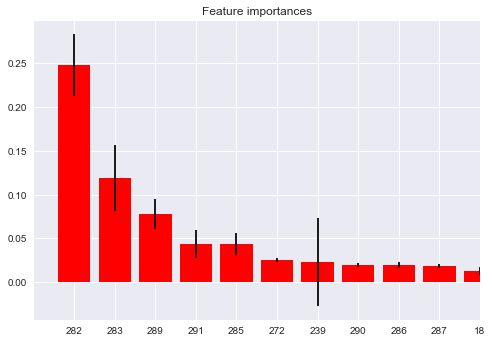

In [17]:
importances = model1.feature_importances_
std = np.std([tree.feature_importances_ for tree in model1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    if importances[indices[f]]>0.005:
        print("%d. feature %d (%f) %f" % (f + 1, indices[f], importances[indices[f]],X[0,indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, 10])
plt.show()

In [18]:
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
model2=XGBRegressor(n_estimators=20,random_state = 0,n_jobs=-1)
model2.fit(x_train, y_train)
print(model2.get_params().keys())
print('SCORE: ',model2.score(x_train,y_train))

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample'])
SCORE:  0.24788209788360727


In [19]:
y_pred2=model2.predict(x_test)
print("R2: ",metrics.r2_score(y_test, y_pred2))

R2:  0.19624161192527667


In [20]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
from sklearn.neighbors import KNeighborsRegressor
model3=XGBRegressor(n_neighbors=5,n_jobs=-1)
model3.fit(x_train, y_train)
print(model3.get_params().keys())
print('SCORE: ',model3.score(x_train,y_train))

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'n_neighbors'])
SCORE:  0.36540796533335596


In [21]:
y_pred3=model3.predict(x_test)
print("R2: ",metrics.r2_score(y_test,y_pred3))

R2:  0.28162028622162616


In [22]:
from mlxtend.regressor import StackingRegressor
model = StackingRegressor(regressors=[model2, model3],meta_regressor=model1)

# Training the stacking classifier

model.fit(X, y)


StackingRegressor(meta_regressor=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
         refit=True,
         regressors=[XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
    ...state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)],
         store_train_meta_features=False, verbose=0)

### Applying the model over test dataset

In [23]:
y_pred=model.predict(x_test)

### Evaluation the model

In [24]:
from sklearn import metrics

print("R2: ",metrics.r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
f= open(os.path.join(output_data_path,'output_RFR.txt'),"a")
f.write(str(datetime.now())+ '\n')
f.write(str(modelinput.keys())+ '\n')
f.write("Model : "+str(model)+ '\n')
f.write("R2 : "+str(metrics.r2_score(y_test, y_pred)) + '\n')
f.write("RMSE: "+str(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))+ '\n')
f.close()

R2:  0.7814407903351408
RMSE:  5.098093100570426


In [25]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=5)
#scores = cross_val_score(model, x_train, y_train, cv=k_fold,scoring='r2')
scores = cross_val_score(model, x_train, y_train, cv=k_fold,scoring='r2')

print('cross_val_score: ',scores.mean(),scores.std())      

cross_val_score:  0.06077121780859222 0.08615136526285475


In [26]:

np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))

0.4390748770084965